In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Arm:
    def __init__(self, p):
        self.p = p

    def pull(self):
        return np.random.binomial(1, self.p)

class MultiBandit:
    def __init__(self, probs = [0.1, 0.2, 0.7, 0.5]):
        self.__arms = [Arm(p) for p in probs]
        self.__regret = 0
        self.__maxp = max(probs)

    def num_arms(self):
        return len(self.__arms)

    def pull(self, arm_num):
        reward = self.__arms[arm_num].pull()
        self.__regret += self.__maxp-self.__arms[arm_num].p
        return reward

    def regret(self):
        return self.__regret

In [ ]:
class EpsilonGreedyAlgorithm:
    def __init__(self, num_arms, horizon, epsilon):
        # Initialize our algorithm
        self.num_arms = num_arms                    # Number of arms present in the bandit
        self.horizon = horizon                      # Total Horizon of the algorithm
        self.epsilon = epsilon                      # epsiolon value for the algorithm
        self.timestep = 0                           # The current timestep while running the algorithm
        self.arm_pulls = np.zeros(num_arms)         # History of number of times each arm was pulled
        self.arm_rewards = np.zeros(num_arms)       # History of the total reward accumulated by each arm
        self.regrets = np.zeros(horizon)            # Total regret at each timestep of the horizon

    def give_best_arm(self):
        average_rewards=self.arm_rewards/self.arm_pulls
        return np.argmax(average_rewards)
        # Return the arm which the algorithm considers to be the best arm at end of algorithm
        pass

    def select_arm(self):
        if np.random.random()<self.epsilon:
            return np.random.randint(self.num_arms)
        else:
            average_rewards=self.arm_rewards/self.arm_pulls
            return np.argmax(average_rewards)
        # Select arm at each time step. You are supposed to return the index of which
        # arm has been selected to pull at this timestep
        pass

    def run_algorithm(self, bandit):
        # This is the proper algorithm. Already completed
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()             # Select the arm using the algorithm
            reward = bandit.pull(arm_to_pull)           # Pull the arm and find our the reward
            self.arm_pulls[arm_to_pull] += 1            # Update the arm pull count and arm reward count
            self.arm_rewards[arm_to_pull] += reward
            self.timestep += 1                          # Update the timestep
            self.regrets[_] = bandit.regret()           # Store the regret values at each timestep

    def plot(self):
        plt.plot(self.regrets)
        plt.xlabel('Timestep')
        plt.ylabel('Regret')
        plt.title('Regret vs Timestep')
        plt.show()
        # Plot the regret graph. Label the X and Y Axis properly using matplotlib library
        pass

Total Regret after 500 timesteps: 43.09999999999999 with assumed best arm 2


/tmp/ipython-input-10-4086952677.py:22: RuntimeWarning: invalid value encountered in divide
  average_rewards=self.arm_rewards/self.arm_pulls


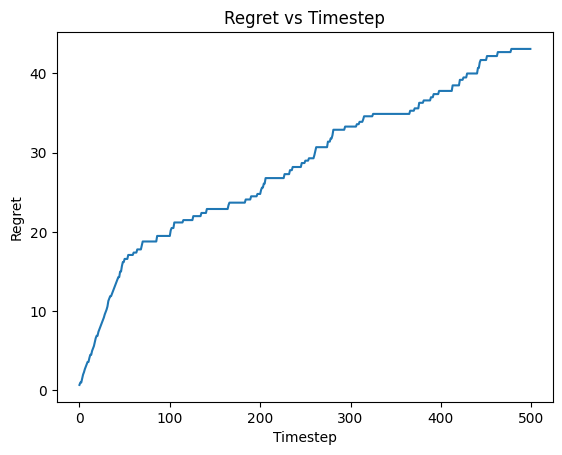

In [ ]:
# Define a MultiBandit instance
bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])
# bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])   # Make custom Multi-armed Bandit. Should work while grading code

# Set the horizon size
H = 500

# Create  Algorithm instance
algorithm = EpsilonGreedyAlgorithm(num_arms=bandit.num_arms(), horizon=H, epsilon=0.2)

# Run the algorithm
algorithm.run_algorithm(bandit)

# Display total regret
print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm.give_best_arm()}")
algorithm.plot()

In [14]:
class UCBAlgorithm:
    def __init__(self, num_arms, horizon):
        # Initialize our algorithm
        self.num_arms = num_arms                    # Number of arms present in the bandit
        self.horizon = horizon                      # Total Horizon of the algorithm
        self.timestep = 0                           # The current timestep while running the algorithm
        self.arm_pulls = np.zeros(num_arms)         # History of number of times each arm was pulled
        self.arm_rewards = np.zeros(num_arms)       # History of the total reward accumulated by each arm
        self.regrets = np.zeros(horizon)            # Total regret at each timestep of the horizon

    def give_best_arm(self):
        avg_rewards=self.arm_rewards/self.arm_pulls
        ucb=avg_rewards+np.sqrt(2*np.log(self.timestep+1)/self.arm_pulls)
        return np.argmax(ucb)
        pass

    def select_arm(self):
        self.timestep+=1
        for arm in range(self.num_arms):
            if self.arm_pulls[arm]==0:
                return arm
        avg_rewards=self.arm_rewards/self.arm_pulls
        ucb=avg_rewards+np.sqrt(2*np.log(self.timestep+1)/self.arm_pulls)
        return np.argmax(ucb)
        pass

    def run_algorithm(self, bandit):
        # This is the proper algorithm. Already completed
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()             # Select the arm using the algorithm
            reward = bandit.pull(arm_to_pull)           # Pull the arm and find our the reward
            self.arm_pulls[arm_to_pull] += 1            # Update the arm pull count and arm reward count
            self.arm_rewards[arm_to_pull] += reward
            self.regrets[_] = bandit.regret()           # Store the regret values at each timestep

    def plot(self):
        plt.plot(self.regrets)
        plt.xlabel('Timestep')
        plt.ylabel('Regret')
        plt.title('Regret vs Timestep')
        plt.show()
        # Plot the regret graph. Label the X and Y Axis properly using matplotlib library
        pass

Total Regret after 500 timesteps: 45.39999999999994 with assumed best arm 2


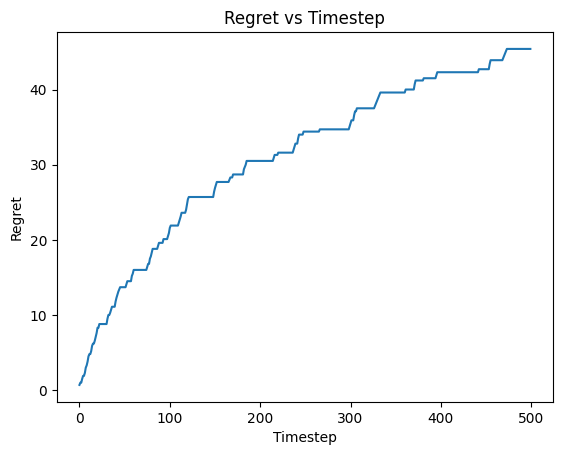

In [15]:
# Define a MultiBandit instance
bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])
# bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])   # Make custom Multi-armed Bandit. Should work while grading code

# Set the horizon size
H = 500

# Create  Algorithm instance
algorithm = UCBAlgorithm(num_arms=bandit.num_arms(), horizon=H)

# Run the algorithm
algorithm.run_algorithm(bandit)

# Display total regret
print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm.give_best_arm()}")
algorithm.plot()

In [11]:
class ThompsonSamplingAlgorithm:
    def __init__(self, num_arms, horizon):
        # Initialize our algorithm
        self.num_arms = num_arms                    # Number of arms present in the bandit
        self.horizon = horizon                      # Total Horizon of the algorithm
        self.successes=np.zeros(num_arms)
        self.failures=np.zeros(num_arms)
        self.regrets = np.zeros(horizon)            # Total regret at each timestep of the horizon

    def give_best_arm(self):
        estimates=self.successes/(self.successes+self.failures)
        return np.argmax(estimates)
        pass

    def select_arm(self):
        samples=np.random.beta(self.successes+1,self.failures+1)
        return np.argmax(samples)
        pass

    def run_algorithm(self, bandit):
        # This is the proper algorithm. Already completed
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()             # Select the arm using the algorithm
            reward = bandit.pull(arm_to_pull)           # Pull the arm and find our the reward
            if reward == 1:
                self.successes[arm_to_pull]+=1
            else:
                self.failures[arm_to_pull]+=1
            self.regrets[_] = bandit.regret()           # Store the regret values at each timestep

    def plot(self):
        plt.plot(self.regrets)
        plt.xlabel('Timestep')
        plt.ylabel('Regret')
        plt.title('Regret vs Timestep')
        plt.show()
        pass

Total Regret after 500 timesteps: 20.000000000000018 with assumed best arm 2


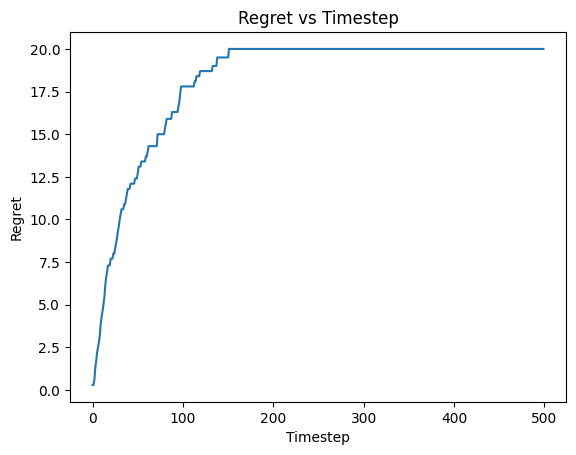

In [13]:
# Define a MultiBandit instance
bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])
# bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])   # Make custom Multi-armed Bandit. Should work while grading code

# Set the horizon size
H = 500

# Create  Algorithm instance
algorithm = ThompsonSamplingAlgorithm(num_arms=bandit.num_arms(), horizon=H)

# Run the algorithm
algorithm.run_algorithm(bandit)

# Display total regret
print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm.give_best_arm()}")
algorithm.plot()